In [1]:
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver as wd
from webdriver_manager.chrome import ChromeDriverManager as cdm
from selenium.webdriver.common.by import By
import time
from datetime import date,timedelta
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
driver = wd.Chrome(cdm().install())

C:\Users\drish\AppData\Local\Temp/ipykernel_20364/1609829132.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome(cdm().install())


### Logging in Insta

In [3]:
driver.get('https://www.instagram.com/')

In [4]:
username=driver.find_element(By.NAME,"username")
password=driver.find_element(By.NAME,"password")

In [5]:
username.send_keys("siyag.12")
password.send_keys("avislrk712")
login=driver.find_elements(By.CLASS_NAME,"sqdOP")
login[1].submit()

### 2-factor authorization

In [6]:
otp=driver.find_element(By.NAME,"verificationCode")
otp.send_keys("778538")
confirm=driver.find_element(By.CLASS_NAME,"sqdOP")
confirm.click()

In [7]:
not_now_click=driver.find_element(By.CLASS_NAME,"yWX7d")
not_now_click.click()

In [8]:
not_now2_click=driver.find_element(By.CLASS_NAME,"_a9_1")
not_now2_click.click()

### Search - food

In [9]:
search=driver.find_element(By.CLASS_NAME,"_aaw8")
search.click()
searchbox=driver.find_element(By.CLASS_NAME,"_aawh")
searchbox.send_keys("food")

In [10]:
base_url="https://www.instagram.com"
no_of_followers={}
search_results=driver.find_elements(By.XPATH,"//div[contains(@class,'_abnx ')]//a[contains(@class,'oajrlxb2')]")
# print(search_results)
for i in search_results[:10]:
#     if "span" in i.get_attribute("innerHTML") or "#" in i.get_attribute("innerHTML"):
#         continue
    if(len(no_of_followers)==10):
        break
    data=bs(i.get_attribute("outerHTML"),"html.parser")
    url=data.a["href"]
    no_of_followers[url] = 0

In [11]:
for i in no_of_followers.keys():
    driver.get(base_url+i)
    time.sleep(3)
    followers=driver.find_element(By.XPATH,"//ul[contains(@class,'_aa_7')]//a[contains(@class,'oajrlxb2')]//span[contains(@class,'_ac2a')]")
    data1=bs(followers.get_attribute("outerHTML"),"html.parser")
    x=data1.string
    if(x[-1]=='K'):
        x=float(x[:-1])*1000
    no_of_followers[i] = float(x)
no_of_followers

{'/delhi_streets_food/': 38600.0,
 '/food_be_best/': 17.0,
 '/foodscapes___/': 489.0,
 '/food.darzee/': 176000.0,
 '/delhifoodguide/': 99300.0,
 '/food_forces/': 28.0,
 '/food/': 180000.0,
 '/foodie_lover12266/': 148.0,
 '/foodstories.dwivediishivam/': 52.0,
 '/foodtalkindia/': 308000.0}

In [12]:
new=sorted(no_of_followers.items(), key=lambda kv:(kv[1], kv[0]))
print(new)
print('\nTop 5 food accounts with most followers')
for i in range(5):
    new.pop(0)
    print(new[len(new)-i-1][0])

[('/food_be_best/', 17.0), ('/food_forces/', 28.0), ('/foodstories.dwivediishivam/', 52.0), ('/foodie_lover12266/', 148.0), ('/foodscapes___/', 489.0), ('/delhi_streets_food/', 38600.0), ('/delhifoodguide/', 99300.0), ('/food.darzee/', 176000.0), ('/food/', 180000.0), ('/foodtalkindia/', 308000.0)]

Top 5 food accounts with most followers
/foodtalkindia/
/food/
/food.darzee/
/delhifoodguide/
/delhi_streets_food/


In [13]:
print(new)

[('/delhi_streets_food/', 38600.0), ('/delhifoodguide/', 99300.0), ('/food.darzee/', 176000.0), ('/food/', 180000.0), ('/foodtalkindia/', 308000.0)]


In [14]:
Dateslist = [date.today() - timedelta(days = day) for day in range(3)]
last_3_dates = []
last_3_months=[]
for i in Dateslist:
    last_3_dates.append(i.day)
    last_3_months.append(i.month)
print(last_3_dates)
print(last_3_months)

[27, 26, 25]
[7, 7, 7]


In [15]:
no_of_posts={}
for i in new:
    driver.get(base_url+i[0])
    time.sleep(3)
    j=0
    while True:
        posts=driver.find_elements(By.XPATH,"//div[contains(@class,'_aa-i')]//div[contains(@class,'_aabd')]")
    #     print(i.get_attribute("outerHTML"))
        data=bs(posts[j].get_attribute("outerHTML"),"html.parser")
        url=base_url+ data.a["href"]
        driver.get(url)
        time.sleep(3)
        post_date=driver.find_element(By.XPATH,"//div[contains(@class,'_aat8')]//time[contains(@class,'_aaqe')]")
        data1=bs(post_date.get_attribute("outerHTML"),"html.parser")
        tags = data1.find("time")
        d=tags["datetime"].split("T")[0]
        m=int(d[5:7])
        day=int(d[8:])
        if i[0] not in no_of_posts.keys():
            no_of_posts[i[0]]=0
        if day not in last_3_dates or m not in last_3_months:
            break
        no_of_posts[i[0]]=no_of_posts.get(i[0],0)+1
        time.sleep(2)
        driver.back()
        j+=1
        time.sleep(3)
    driver.back()
no_of_posts

{'/delhi_streets_food/': 0,
 '/delhifoodguide/': 0,
 '/food.darzee/': 3,
 '/food/': 3,
 '/foodtalkindia/': 3}

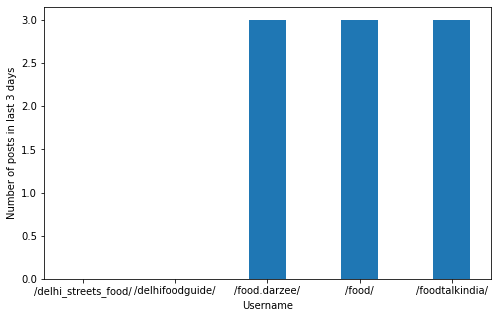

In [16]:
accounts=list(no_of_posts.keys())
number=list(no_of_posts.values())
fig = plt.figure(figsize = (8, 5))
plt.bar(accounts,number,width=0.4)
plt.ylabel("Number of posts in last 3 days")
plt.xlabel("Username")
plt.show()

### Frequency of hashtags

In [19]:
hashtags={}
for i in new:
    driver.get(base_url+i[0])
    time.sleep(3)
    j=0
    hashtags[i[0]]={}
    while j<10:
        posts=driver.find_elements(By.XPATH,"//div[contains(@class,'_aa-i')]//div[contains(@class,'_aabd')]")
        if(j>len(posts)):
            break
        data=bs(posts[j].get_attribute("outerHTML"),"html.parser")
        url=base_url+ data.a["href"]
        driver.get(url)
        time.sleep(3)
        post_content=driver.find_element(By.XPATH,"//div[contains(@class,'_a9zs')]//span[contains(@class,'_aacl')]")
        data1=bs(post_content.get_attribute("outerHTML"),"html.parser")
        x=data1.find_all('a')
        for x1 in x:
            if(x1.string[0]=='#'):
                hashtags[i[0]][x1.string] = hashtags[i[0]].get(x1.string,0)+1
        time.sleep(2)
        driver.back()
        j+=1
        time.sleep(3)
    driver.back()
print(hashtags)

{'/delhi_streets_food/': {'#guava': 1, '#summer': 1, '#weekend': 1, '#icecream': 1, '#coldstone': 1, '#coldstonecreamery': 1, '#gulabjamun': 1, '#dessert': 1, '#bewafaikargaya': 3, '#bpraak': 4, '#lekh': 4, '#whitehillmusic': 4, '#bhutta': 1, '#challi': 1, '#uddgaya': 1, '#kachori': 1, '#breakfast': 1, '#loveit': 1, '#cholebhature': 1, '#bhature': 1, '#chole': 1, '#desifood': 1, '#foodiesofinstagram': 1, '#foodporn': 1, '#reelkarofeelkaro': 1, '#yummyinmytummy': 1, '#delhistreetfood': 1, '#reelindia': 1, '#veganfood': 1, '#indianfoodbloggers': 1, '#indianfoods': 1, '#reelsvideo': 1, '#indianblogger': 1, '#reelitfeelit': 1, '#localfood': 1}, '/delhifoodguide/': {'#part2': 1, '#part1': 1}, '/food.darzee/': {'#DrSidSays': 2, '#fish': 1, '#CutThecrap': 2, '#curd': 1, '#healthyfoodtips': 6, '#healthyfood': 4, '#foodmyths': 1, '#fishcurry': 1, '#healthyliving': 1, '#Fooddarzee': 8, '#chickenlover': 1, '#chickensalad': 1, '#chickenfry': 1, '#chickenrecipes': 2, '#recipereel': 1, '#trending': 

In [20]:
# print(hashtags.values())
freq={}
for v in hashtags.values():
#     print(v)
    for w in v.keys():
        freq[w]=freq.get(w,0)+v[w]
print(freq)

{'#guava': 1, '#summer': 2, '#weekend': 1, '#icecream': 4, '#coldstone': 1, '#coldstonecreamery': 1, '#gulabjamun': 1, '#dessert': 1, '#bewafaikargaya': 3, '#bpraak': 4, '#lekh': 4, '#whitehillmusic': 4, '#bhutta': 1, '#challi': 1, '#uddgaya': 1, '#kachori': 1, '#breakfast': 2, '#loveit': 1, '#cholebhature': 1, '#bhature': 1, '#chole': 1, '#desifood': 1, '#foodiesofinstagram': 1, '#foodporn': 2, '#reelkarofeelkaro': 1, '#yummyinmytummy': 1, '#delhistreetfood': 1, '#reelindia': 1, '#veganfood': 1, '#indianfoodbloggers': 1, '#indianfoods': 1, '#reelsvideo': 1, '#indianblogger': 1, '#reelitfeelit': 2, '#localfood': 1, '#part2': 1, '#part1': 1, '#DrSidSays': 2, '#fish': 1, '#CutThecrap': 2, '#curd': 1, '#healthyfoodtips': 6, '#healthyfood': 4, '#foodmyths': 1, '#fishcurry': 1, '#healthyliving': 1, '#Fooddarzee': 8, '#chickenlover': 1, '#chickensalad': 1, '#chickenfry': 1, '#chickenrecipes': 2, '#recipereel': 1, '#trending': 5, '#recipevideo': 1, '#easyrecipes': 1, '#food': 12, '#foodie': 1

In [21]:
with open('word_freq.csv', 'w') as f:
    f.write("Hashtags , Frequency\n")
    for key in freq.keys():
        f.write("%s , %s\n"%(key,freq[key]))

In [22]:
new1=sorted(freq.items(), key=lambda kv:(kv[1], kv[0]),reverse=True)
top_hash = new1[:5]
top_hash

[('#instagood', 12),
 ('#food', 12),
 ('#instagram', 11),
 ('#foodies', 11),
 ('#foodie', 11)]

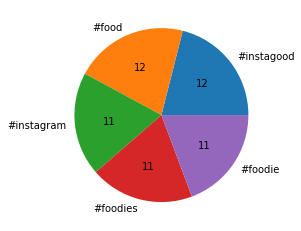

In [28]:
label = []
vals = []
for t in top_hash:
    label.append(t[0])
    vals.append(t[1])
def absolute_value(val):
    a  = np.round(val/100.*vals.sum(), 0)
    return int(a)
label=np.array(label)
vals=np.array(vals)
plt.pie(vals,labels=label,autopct=absolute_value)
plt.show()

### Likes Ratio

In [37]:
no_of_likes={}
for i in new:
    driver.get(base_url+i[0])
    time.sleep(3)
    j=0
    no_of_likes[i[0]]=0
    while j<10:
        posts=driver.find_elements(By.XPATH,"//div[contains(@class,'_aa-i')]//div[contains(@class,'_aabd')]")
        if(j>len(posts)):
            break
        data=bs(posts[j].get_attribute("outerHTML"),"html.parser")
        url=base_url+ data.a["href"]
        driver.get(url)
        time.sleep(3)
        likes=driver.find_elements(By.XPATH,"//section[contains(@class,'_aam_')]//a[contains(@class,'oajrlxb2')]")
        if likes==[]:
            driver.back()
            j+=1
            time.sleep(3)
            continue
        data1=bs(likes[-1].get_attribute("outerHTML"),"html.parser")
#         print(data1.span.string)
        no_of_likes[i[0]]=no_of_likes.get(i[0],0)+int(data1.span.string.replace(',',''))
        time.sleep(2)
        driver.back()
        j+=1
        time.sleep(3)
    driver.back()

In [40]:
no_of_likes

{'/delhi_streets_food/': 71364,
 '/delhifoodguide/': 5202,
 '/food.darzee/': 8064,
 '/foodtalkindia/': 333,
 '/food/': 1406}

In [41]:
avg_likes={}
for i in no_of_likes.keys():
    avg_likes[i]=no_of_likes[i]/10
print(avg_likes)

{'/delhi_streets_food/': 7136.4, '/delhifoodguide/': 520.2, '/food.darzee/': 806.4, '/foodtalkindia/': 33.3, '/food/': 140.6}


In [43]:
like_ratio={}
for i in new:
    like_ratio[i[0]] = avg_likes[i[0]] / i[1]
print(like_ratio)

{'/delhi_streets_food/': 0.18488082901554403, '/delhifoodguide/': 0.005238670694864049, '/food.darzee/': 0.004581818181818182, '/food/': 0.0007811111111111111, '/foodtalkindia/': 0.00010811688311688311}


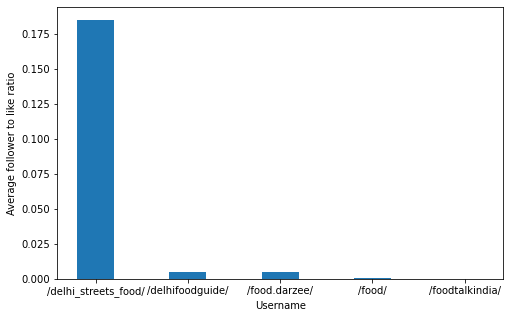

In [49]:
#### make bar graph
accounts=list(like_ratio.keys())
ratio=list(like_ratio.values())
fig = plt.figure(figsize = (8, 5))
plt.bar(accounts,ratio,width=0.4)
plt.ylabel("Average follower to like ratio")
plt.xlabel("Username")
plt.show()